In [1]:
from clickhouse_driver import Client
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = Client(host='oleg.orbita.work', port=9000, user='student_ml', password='CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa', settings={'use_numpy': True})

## 1. Загрузите данные из таблицы `weather_history`, которая находится в базе `students_datas`

Создадим SQL-запрос для загрузки данных из таблицы `weather_history`

In [3]:
query = "SELECT * FROM students_datas.weather_history"

In [4]:
rows = client.execute(query)

Выведем часть таблицы

In [5]:
df = pd.DataFrame(rows)
df

,0,1,2,3,4,5,6,7
0,29838,1960,1,1,-6.9,-5.4,-3.8,0.1
1,29838,1960,1,2,-14.4,-10.0,-6.7,0.5
2,29838,1960,1,3,-21.7,-19.7,-13.4,0.0
3,29838,1960,1,4,-24.9,-21.4,-16.9,0.0
4,29838,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...,...
22276,29838,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,29838,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,29838,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,29838,2020,12,30,-21.8,-13.6,-9.9,0.8


Добавим наименования столбцов

In [6]:
# Добавляем названия для столбцов
new_columns = ['idx', 'year', 'month', 'day', 'min_t', 'average_t', 'max_t', 'rainfall'] 
df.columns = new_columns
df

,idx,year,month,day,min_t,average_t,max_t,rainfall
0,29838,1960,1,1,-6.9,-5.4,-3.8,0.1
1,29838,1960,1,2,-14.4,-10.0,-6.7,0.5
2,29838,1960,1,3,-21.7,-19.7,-13.4,0.0
3,29838,1960,1,4,-24.9,-21.4,-16.9,0.0
4,29838,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...,...
22276,29838,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,29838,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,29838,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,29838,2020,12,30,-21.8,-13.6,-9.9,0.8


Проверим типы данных и при необходимости преобразуем их в корректные

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   idx        22281 non-null  int64 
 1   year       22281 non-null  int64 
 2   month      22281 non-null  int64 
 3   day        22281 non-null  int64 
 4   min_t      22052 non-null  object
 5   average_t  22062 non-null  object
 6   max_t      22070 non-null  object
 7   rainfall   22051 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


Столбцы `min_t`, `average_t`, `max_t`, `rainfall` необходимо преобразовать в тип `float64`

In [8]:
# Преобразуем типы данных в корректные
df['min_t'] = pd.to_numeric(df['min_t'], errors='coerce')
df['average_t'] = pd.to_numeric(df['average_t'], errors='coerce')
df['max_t'] = pd.to_numeric(df['max_t'], errors='coerce')
df['rainfall'] = pd.to_numeric(df['rainfall'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idx        22281 non-null  int64  
 1   year       22281 non-null  int64  
 2   month      22281 non-null  int64  
 3   day        22281 non-null  int64  
 4   min_t      22026 non-null  float64
 5   average_t  22036 non-null  float64
 6   max_t      21512 non-null  float64
 7   rainfall   22023 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.4 MB


## 2. Удалите столбец `idx`

In [10]:
# Удаляем столбец idx
df.drop(columns = ['idx'], inplace = True)
df

,year,month,day,min_t,average_t,max_t,rainfall
0,1960,1,1,-6.9,-5.4,-3.8,0.1
1,1960,1,2,-14.4,-10.0,-6.7,0.5
2,1960,1,3,-21.7,-19.7,-13.4,0.0
3,1960,1,4,-24.9,-21.4,-16.9,0.0
4,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,2020,12,30,-21.8,-13.6,-9.9,0.8


## 3. Используя метод `info()`, ответьте на вопросы

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       22281 non-null  int64  
 1   month      22281 non-null  int64  
 2   day        22281 non-null  int64  
 3   min_t      22026 non-null  float64
 4   average_t  22036 non-null  float64
 5   max_t      21512 non-null  float64
 6   rainfall   22023 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


#### 3.1. Есть ли в данных пропущенные значения?

In [12]:
print("Количество пропусков по столбцам:")
df.isnull().sum()

Количество пропусков по столбцам:


year           0
month          0
day            0
min_t        255
average_t    245
max_t        769
rainfall     258
dtype: int64

Если значения `Non-Null Count` в `info()` меньше общего количества строк - значит, есть пропуски.  
Пропуски есть в столбцах `min_t`, `average_t`, `max_t` и `rainfall`

#### 3.2. В каком столбце данных больше всего пропущенных значений?

In [13]:
print("Столбец с максимальным количеством пропусков:") 
df.isnull().sum().idxmax()

Столбец с максимальным количеством пропусков:


'max_t'

In [14]:
print("Количество пропусков в данном столбце:")
df.isnull().sum().max()

Количество пропусков в данном столбце:


np.int64(769)

Больше всего пропущенных значений в столбце `max_t` (максимальная температура воздуха) - 769

## 4. В данных за какой год больше всего пропусков?

In [15]:
miss_year = df.groupby('year').apply(lambda x: x.isnull().sum().sum(), include_groups = False)

In [16]:
print("Год с максимальным количеством пропусков:")
miss_year.idxmax()

Год с максимальным количеством пропусков:


np.int64(1961)

In [17]:
print("Количество пропусков в данном году:")
miss_year.max()

Количество пропусков в данном году:


np.int64(345)

Больше всего пропусков в данных за 1961 год - 345

## 5. Объедините столбцы "Год", "Месяц" и "День" в один столбец "Дата" в формате гггг-мм-дд (2000-01-20). Данные в новом столбце должны иметь формат `datetime`

In [18]:
# Объединяем столбцы year, month и day в один столбец date
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.drop(columns = ['year', 'month', 'day'], inplace = True)
df = df.reindex(columns = ['date','min_t','average_t','max_t','rainfall'])
df

,date,min_t,average_t,max_t,rainfall
0,1960-01-01,-6.9,-5.4,-3.8,0.1
1,1960-01-02,-14.4,-10.0,-6.7,0.5
2,1960-01-03,-21.7,-19.7,-13.4,0.0
3,1960-01-04,-24.9,-21.4,-16.9,0.0
4,1960-01-05,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...
22276,2020-12-27,-41.7,-36.3,-32.8,0.0
22277,2020-12-28,-40.1,-34.2,-25.5,0.0
22278,2020-12-29,-28.2,-23.9,-18.6,0.0
22279,2020-12-30,-21.8,-13.6,-9.9,0.8


## Для выполнения следующих заданий необходимо избавиться от строк с пропусками, т. к. они могут искажать результаты

Для избавления от пропусков можно применить следующие методы:
- **Удаление строк с пропусками** - если пропущено немного и потери не критичны
- **Заполнение пропусков** - у числовых признаков пропуски можно заполнить средним значением, медианой или модой
- **Использование модели** - обучение модели на существующих данных и предсказание недостающих

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       22281 non-null  datetime64[ns]
 1   min_t      22026 non-null  float64       
 2   average_t  22036 non-null  float64       
 3   max_t      21512 non-null  float64       
 4   rainfall   22023 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 870.5 KB


Найдем процент строк с пропусками от общего количества строк

In [20]:
(df.isnull().any(axis=1).mean()) * 100

np.float64(6.395583681163323)

В таблице 6,4% строк содержат пропуски. Это достаточно большое количество (более 5%), поэтому просто удалить эти строки нельзя - данные будут искажены. Поэтому заполним пропуски средними значениями.

In [21]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       22281 non-null  datetime64[ns]
 1   min_t      22281 non-null  float64       
 2   average_t  22281 non-null  float64       
 3   max_t      22281 non-null  float64       
 4   rainfall   22281 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 870.5 KB


Теперь значение `Non-Null Count` по всем столбцам совпадает с общим количеством строк. Значит, пропусков в данных нет

## 6. Для каждого наблюдения рассчитайте размах температур (разность максимальной и минимальной суточных температур) и количество предшествующих ему дней без осадков (используйте циклы Python и условный оператор)

In [22]:
# Добавим новый столбец - range_t (разность максимальной и минимальной температур)
df['range_t'] = df['max_t'] - df['min_t']
df

,date,min_t,average_t,max_t,rainfall,range_t
0,1960-01-01,-6.9,-5.4,-3.8,0.1,3.1
1,1960-01-02,-14.4,-10.0,-6.7,0.5,7.7
2,1960-01-03,-21.7,-19.7,-13.4,0.0,8.3
3,1960-01-04,-24.9,-21.4,-16.9,0.0,8.0
4,1960-01-05,-18.3,-8.0,-3.3,4.1,15.0
...,...,...,...,...,...,...
22276,2020-12-27,-41.7,-36.3,-32.8,0.0,8.9
22277,2020-12-28,-40.1,-34.2,-25.5,0.0,14.6
22278,2020-12-29,-28.2,-23.9,-18.6,0.0,9.6
22279,2020-12-30,-21.8,-13.6,-9.9,0.8,11.9


In [23]:
df['days_no_rain'] = 0
for i in range(1, len(df)):
    if df.loc[i - 1, 'rainfall'] == 0: # проверка, были ли в предыдущий день осадки
        df.loc[i, 'days_no_rain'] = df.loc[i - 1, 'days_no_rain'] + 1  
df

,date,min_t,average_t,max_t,rainfall,range_t,days_no_rain
0,1960-01-01,-6.9,-5.4,-3.8,0.1,3.1,0
1,1960-01-02,-14.4,-10.0,-6.7,0.5,7.7,0
2,1960-01-03,-21.7,-19.7,-13.4,0.0,8.3,0
3,1960-01-04,-24.9,-21.4,-16.9,0.0,8.0,1
4,1960-01-05,-18.3,-8.0,-3.3,4.1,15.0,2
...,...,...,...,...,...,...,...
22276,2020-12-27,-41.7,-36.3,-32.8,0.0,8.9,1
22277,2020-12-28,-40.1,-34.2,-25.5,0.0,14.6,2
22278,2020-12-29,-28.2,-23.9,-18.6,0.0,9.6,3
22279,2020-12-30,-21.8,-13.6,-9.9,0.8,11.9,4


## 7. Определите самый длинный период засухи

In [24]:
no_rain_max = df['days_no_rain'].max()
no_rain_idx = df[df['days_no_rain'] == no_rain_max]
no_rain_idx

,date,min_t,average_t,max_t,rainfall,range_t,days_no_rain
7356,1980-02-21,-6.4,-2.9,0.0,0.5,6.4,27
13616,1997-04-12,8.0,10.6,19.6,0.5,11.6,27


Самых длинных периодов засухи было 2 - в 1980 и 1997 годах. Они длились по 27 дней

In [25]:
# Определяем начало и конец первого периода засухи
no_rain_start = no_rain_idx.index[0] - no_rain_max + 1
no_rain_end = no_rain_idx.index[0] + 1
df.loc[no_rain_start:no_rain_end]

,date,min_t,average_t,max_t,rainfall,range_t,days_no_rain
7330,1980-01-26,-32.700000,-30.8,-27.3,0.0,5.400000,1
7331,1980-01-27,-36.000000,-31.1,-24.8,0.0,11.200000,2
7332,1980-01-28,-32.200000,-26.1,-16.2,0.0,16.000000,3
7333,1980-01-29,-27.900000,-22.2,-16.4,0.0,11.500000,4
7334,1980-01-30,-23.900000,-19.5,-12.5,0.0,11.400000,5
7335,1980-01-31,-24.100000,-19.5,-14.5,0.0,9.600000,6
7336,1980-02-01,-24.300000,-19.9,-14.4,0.0,9.900000,7
7337,1980-02-02,-20.300000,-16.3,-10.4,0.0,9.900000,8
7338,1980-02-03,-18.700000,-15.1,-9.6,0.0,9.100000,9
7339,1980-02-04,-23.700000,-15.8,-8.0,0.0,15.700000,10


In [26]:
# Определяем начало и конец второго периода засухи
no_rain_start = no_rain_idx.index[1] - no_rain_max + 1
no_rain_end = no_rain_idx.index[1] + 1
df.loc[no_rain_start:no_rain_end]

,date,min_t,average_t,max_t,rainfall,range_t,days_no_rain
13590,1997-03-17,-9.8,-1.9,5.3,0.0,15.1,1
13591,1997-03-18,-7.1,0.5,9.2,0.0,16.3,2
13592,1997-03-19,-9.5,-1.1,7.3,0.0,16.8,3
13593,1997-03-20,-5.5,-0.9,5.1,0.0,10.6,4
13594,1997-03-21,-7.8,-2.2,3.7,0.0,11.5,5
13595,1997-03-22,-7.8,-3.2,1.8,0.0,9.6,6
13596,1997-03-23,-7.7,-1.5,7.7,0.0,15.4,7
13597,1997-03-24,-5.2,1.8,9.0,0.0,14.2,8
13598,1997-03-25,-6.9,1.7,10.9,0.0,17.8,9
13599,1997-03-26,-5.7,1.8,9.3,0.0,15.0,10


## 8. Для каждого года вычислите среднегодовую температуру и общее количество осадков. Запишите результаты в объекты `Series`

In [27]:
# Вычисляем среднегодовую температуру и общее количество осадков по годам
years = df.groupby(df['date'].dt.year).agg({
    'average_t' : 'mean',
    'rainfall' : 'sum'
})
years

,average_t,rainfall
date,,
1960,-0.115831,463.390442
1961,2.352118,520.917831
1962,3.164721,372.190442
1963,3.501206,431.472610
1964,2.292413,427.917831
...,...,...
2016,3.046784,486.217831
2017,3.443382,500.717831
2018,1.642545,444.745221


#### 8.1. Какой год можно считать самым теплым? Какой самым холодным?

In [28]:
print("Самый теплый год:")
years['average_t'].idxmax()

Самый теплый год:


np.int32(2020)

In [29]:
print("Среднегодовая температура в этот год:")
years['average_t'].max()

Среднегодовая температура в этот год:


np.float64(4.753856630035104)

In [30]:
print("Самый холодный год:")
years['average_t'].idxmin()

Самый холодный год:


np.int32(1969)

In [31]:
print("Среднегодовая температура в этот год:")
years['average_t'].min()

Среднегодовая температура в этот год:


np.float64(-0.5901211964481533)

Самый теплым годом стал 2020, среднегодовая температура в этот год составила +4,75 градусов.  
Самым холодным стал 1969 год, среднегодовая температура составила -0,59 градусов.

#### 8.2. В какой год выпало больше всего осадков? В какой меньше всего?

In [32]:
print("Год с наибольшим количеством осадков:")
years['rainfall'].idxmax()

Год с наибольшим количеством осадков:


np.int32(1970)

In [33]:
print("Количество осадков в этот год:")
years['rainfall'].max()

Количество осадков в этот год:


np.float64(566.0630522635427)

In [34]:
print("Год с наименьшим количеством осадков:")
years['rainfall'].idxmin()

Год с наименьшим количеством осадков:


np.int32(1973)

In [35]:
print("Количество осадков в этот год:")
years['rainfall'].min()

Количество осадков в этот год:


np.float64(261.5178313581256)

Больше всего осадков выпало в 1970 году - 566 мм, а меньше всего в 1973 году - 261,5 мм

#### Используя запись `имя_серии.plot()` вы можете построить график и посмотреть, как изменялась температура. С помощью `имя_серии.plot.bar()` можно отобразить на столбиковой диаграмме количество осадков, выпавших в каждый год

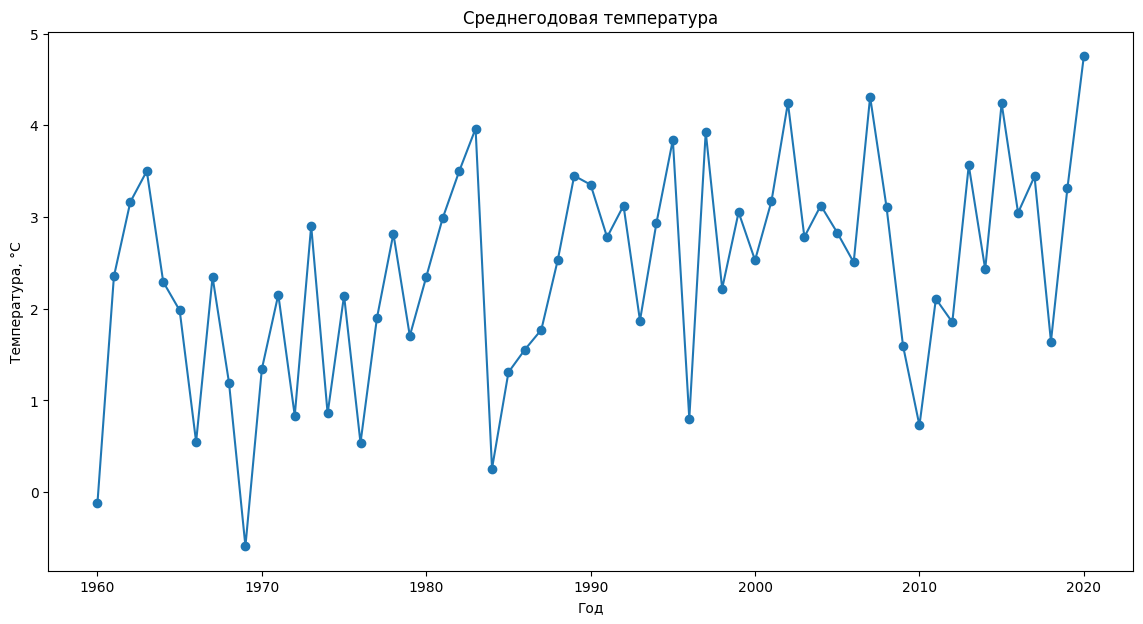

In [36]:
years['average_t'].plot(figsize = (14, 7), marker = 'o')
plt.title('Среднегодовая температура')
plt.xlabel('Год')
plt.ylabel('Температура, °C')
plt.show()

Исходя из данного графика мы можем увидеть, что наибольшая среднегодовая температура была в 2020 году, а наименьшая - в 1969 году, что подтверждается нашими расчетами выше

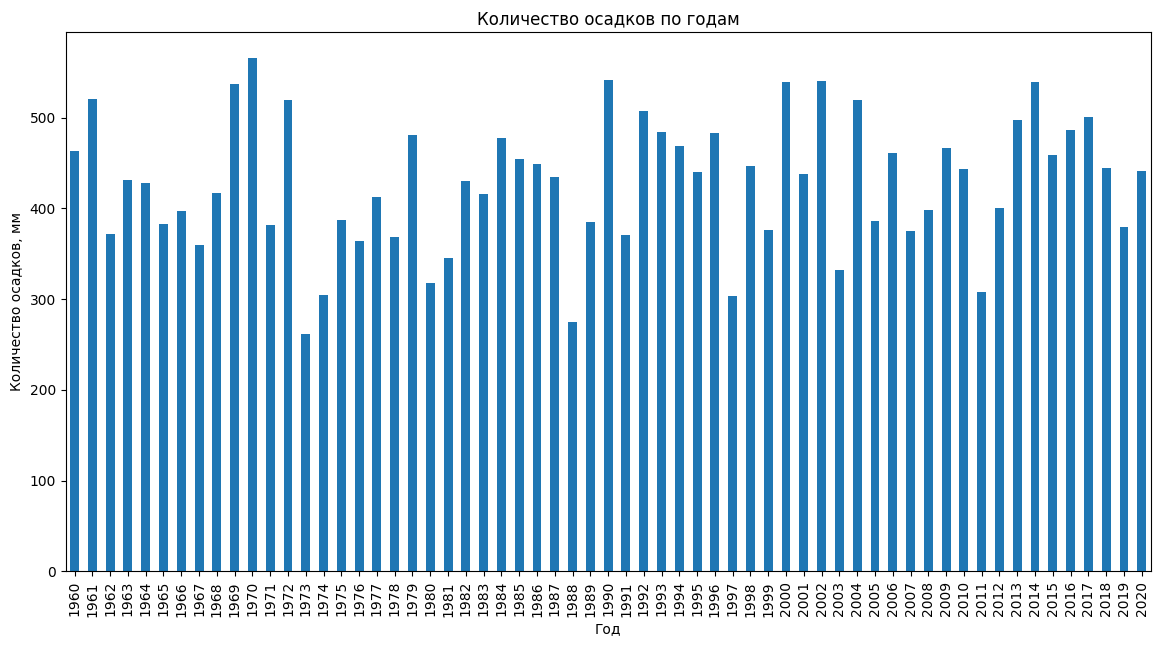

In [37]:
years['rainfall'].plot.bar(figsize = (14, 7))
plt.title('Количество осадков по годам')
plt.xlabel('Год')
plt.ylabel('Количество осадков, мм')
plt.show()

На данной диаграмме мы можем увидеть, что наибольшее количество осадков выпало в 1970 году, а наименьшее - в 1973 году, что также подтверждается нашими расчетами выше

## 9. Выведите наблюдения, удовлетворяющие условиям

#### 9.1. Средняя температура воздуха ниже -30 °C

In [38]:
df[df['average_t'] < -30]

,date,min_t,average_t,max_t,rainfall,range_t,days_no_rain
17,1960-01-18,-31.4,-31.2,-27.200000,0.0,4.200000,1
18,1960-01-19,-35.8,-33.2,-29.700000,0.0,6.100000,2
323,1960-11-19,-31.3,-30.1,8.198247,0.8,39.498247,0
361,1960-12-27,-34.2,-30.2,8.198247,0.0,42.398247,1
373,1961-01-08,-36.2,-34.5,8.198247,0.0,44.398247,0
...,...,...,...,...,...,...,...
21585,2019-02-05,-38.0,-32.0,-24.300000,0.0,13.700000,1
21588,2019-02-08,-38.3,-32.8,-24.800000,0.0,13.500000,4
22275,2020-12-26,-35.5,-31.6,-23.400000,0.0,12.100000,0
22276,2020-12-27,-41.7,-36.3,-32.800000,0.0,8.900000,1


In [39]:
print("Количество дней со средней температурой воздуха ниже -30 °C:")
len(df[df['average_t'] < -30])

Количество дней со средней температурой воздуха ниже -30 °C:


241

За весь период наблюдений средняя температура воздуха была ниже -30 °C 241 раз

#### 9.2. Средняя температура воздуха выше 27 °C и количество дней без осадков больше 3

In [40]:
df[(df['average_t'] > 27) & (df['days_no_rain'] > 3)]

,date,min_t,average_t,max_t,rainfall,range_t,days_no_rain
1270,1963-06-24,19.400000,27.4,33.4,0.0,14.000000,8
2029,1965-07-22,19.800000,27.3,35.0,0.0,15.200000,9
3471,1969-07-03,-2.618474,27.1,33.2,0.0,35.818474,4
3472,1969-07-04,22.100000,28.9,35.5,0.0,13.400000,5
3473,1969-07-05,23.200000,27.9,34.2,0.0,11.000000,6
5305,1974-07-11,16.900000,27.8,37.9,0.0,21.000000,18
6381,1977-06-21,19.500000,27.2,32.9,0.0,13.400000,24
8601,1983-07-20,20.400000,27.2,33.7,0.0,13.300000,6
10395,1988-06-17,19.400000,28.3,36.6,0.0,17.200000,6
11884,1992-07-15,17.900000,28.0,37.1,0.0,19.200000,6


In [41]:
print("Количество дней со средней температурой воздуха выше 27 °C и количеством дней без осадков больше 3:")
len(df[(df['average_t'] > 27) & (df['days_no_rain'] > 3)])

Количество дней со средней температурой воздуха выше 27 °C и количеством дней без осадков больше 3:


11

За весь период наблюдений средняя температура воздуха была выше 27 °C, а количество дней без осадков было больше 3-х 11 раз